In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from newGraphDiscovery import GraphDiscoveryNew
import numpy as onp
import matplotlib.pyplot as plt
from tqdm import tqdm
import networkx as nx
from sklearn.preprocessing import StandardScaler
import pickle
from glob import glob

# Linear FPUT model

In [3]:
df=pd.read_csv('FPUT_linear.csv')
node_names=df.columns
X=df.to_numpy()
X=(X-onp.mean(X,axis=0))/onp.std(X,axis=0)
df

,$X_{0}$,$X_{1}$,$X_{2}$,$X_{3}$,$X_{4}$,$X_{5}$,$X_{6}$,$X_{7}$,$X_{8}$,$X_{9}$,...,$\ddot{X}_{0}$,$\ddot{X}_{1}$,$\ddot{X}_{2}$,$\ddot{X}_{3}$,$\ddot{X}_{4}$,$\ddot{X}_{5}$,$\ddot{X}_{6}$,$\ddot{X}_{7}$,$\ddot{X}_{8}$,$\ddot{X}_{9}$
0,0.200543,-0.268028,0.483134,-0.105517,-0.074423,0.334300,-0.187482,0.029494,-0.138106,-0.001547,...,-54.198255,98.798327,-108.524794,50.199359,30.587862,-75.370803,59.839341,-31.150640,24.636881,-10.935974
1,-0.017160,0.152926,0.149011,-0.115220,0.002534,-0.062572,-0.163796,-0.093034,-0.052793,0.110310,...,15.166878,-14.094042,-21.085597,30.940767,-14.811615,-2.925602,13.930864,-2.472201,9.951854,-22.146463
2,0.106949,-0.202711,0.473624,-0.130464,-0.052804,0.383457,-0.222962,-0.014684,-0.105294,-0.017773,...,-33.745320,79.865593,-103.714248,55.221631,29.046586,-84.456997,65.990359,-24.209833,14.428580,-5.649607
3,-0.004821,0.306659,-0.309887,0.047212,-0.022266,-0.016344,-0.012491,-0.053466,0.451172,-0.311484,...,25.620459,-75.170161,78.865289,-34.552810,6.107416,-0.167508,-3.631148,44.194637,-102.650720,87.005270
4,-0.124585,0.056731,-0.379151,0.143918,0.150544,-0.173367,0.176687,0.145475,-0.041774,-0.064768,...,24.778037,-49.993023,77.674934,-41.831810,-26.773515,54.591217,-30.882615,-12.639003,13.304734,7.108632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.146389,0.006213,0.403906,-0.256289,0.257063,-0.204374,0.420246,-0.265031,0.169803,0.006959,...,-23.211749,43.567359,-85.688913,95.057294,-78.957921,87.970667,-106.101685,90.728989,-48.411955,12.626741
996,0.198881,0.128679,-0.316517,0.254229,-0.527290,0.141267,-0.251007,-0.111275,-0.334562,0.488099,...,-21.795657,-30.374574,82.291305,-109.533434,117.456120,-85.927293,43.092495,-29.404581,84.721841,-106.171611
997,-0.192739,-0.083689,0.311481,-0.068822,-0.134921,-0.426854,0.014337,-0.195667,0.027542,-0.031051,...,24.444986,23.175640,-62.813320,25.450580,-18.292596,59.383076,-52.746789,35.090210,-22.825899,7.261119
998,-0.154976,0.074445,-0.066226,-0.182642,0.284772,0.080398,-0.274946,0.027231,0.325166,-0.052136,...,31.136173,-29.977377,1.964557,47.290251,-54.414828,-12.228503,53.259083,-0.343514,-54.694186,34.784423


In [ ]:
beta=onp.array([0.1,0.01,0.001])
graph_discovery=GraphDiscoveryNew(X.T,beta,onp.array(node_names),l=1)
graph_discovery.find_ancestors("$\ddot{X}_{5}$",gamma='auto',kPCA='no')

In [5]:
beta=onp.array([0.1,0.01,0.001])
graph_discovery=GraphDiscoveryNew(X.T,beta,onp.array(node_names),l=1,verbose=False)
for node in graph_discovery.names:
    print(f'inspecting {node}')
    graph_discovery.find_ancestors(node,gamma='auto',kPCA='no')
    print('\n')
    pickle.dump(graph_discovery.G, open(f'graph_linear.pickle', 'wb'))

inspecting $X_{0}$


inspecting $X_{1}$


inspecting $X_{2}$


inspecting $X_{3}$


inspecting $X_{4}$


inspecting $X_{5}$


inspecting $X_{6}$


inspecting $X_{7}$


inspecting $X_{8}$


inspecting $X_{9}$


inspecting $\dot{X}_{0}$


/Users/theobourdais/Desktop/Caltech/Research/Computational hypergraph discovery/GraphDiscovery/newGraphDiscovery.py:296: RuntimeWarning: overflow encountered in exp
  vals = 1 / (1 + eigenvalues * onp.exp(-gamma_log))




inspecting $\dot{X}_{1}$


inspecting $\dot{X}_{2}$


inspecting $\dot{X}_{3}$


inspecting $\dot{X}_{4}$


inspecting $\dot{X}_{5}$


inspecting $\dot{X}_{6}$


inspecting $\dot{X}_{7}$


inspecting $\dot{X}_{8}$


inspecting $\dot{X}_{9}$


inspecting $\ddot{X}_{0}$


inspecting $\ddot{X}_{1}$


inspecting $\ddot{X}_{2}$


inspecting $\ddot{X}_{3}$


inspecting $\ddot{X}_{4}$


inspecting $\ddot{X}_{5}$


inspecting $\ddot{X}_{6}$


inspecting $\ddot{X}_{7}$


inspecting $\ddot{X}_{8}$


inspecting $\ddot{X}_{9}$




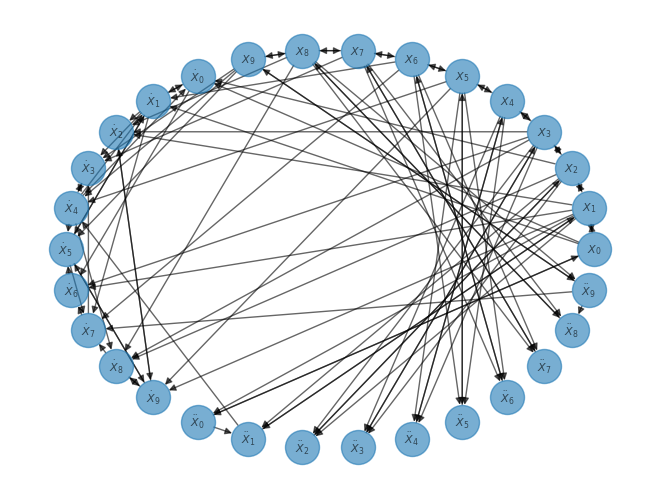

In [9]:
graph_discovery.plot_graph(type_label=False)

# Parallelization ? 

In [ ]:



for node in df.columns:
    print(f'inspecting {node}')
    beta=onp.array([0.1,0.01,0.001])
    graph_discovery=GraphDiscoveryNew(X.T,beta,onp.array(node_names),l=1)
    graph_discovery.find_ancestors(node,gamma='auto',kPCA='no')
    pickle.dump(graph_discovery.G, open(f'graph_{node}.pickle', 'wb'))
    print('\n')

# Non-Linear FPUT

In [11]:
df=pd.read_csv('FPUT_non_linear.csv')
node_names=df.columns
X=df.to_numpy()
X=(X-onp.mean(X,axis=0))/onp.std(X,axis=0)
df

,$X_{0}$,$X_{1}$,$X_{2}$,$X_{3}$,$X_{4}$,$X_{5}$,$X_{6}$,$X_{7}$,$X_{8}$,$X_{9}$,...,$\ddot{X}_{0}$,$\ddot{X}_{1}$,$\ddot{X}_{2}$,$\ddot{X}_{3}$,$\ddot{X}_{4}$,$\ddot{X}_{5}$,$\ddot{X}_{6}$,$\ddot{X}_{7}$,$\ddot{X}_{8}$,$\ddot{X}_{9}$
0,-0.353162,-0.027925,-0.060415,0.151765,0.010142,0.243446,-0.032991,-0.229524,0.236459,0.039009,...,54.993213,-31.459180,20.458112,-28.800655,30.624385,-41.365914,7.920080,57.560078,-57.613237,13.551324
1,0.181612,-0.040168,0.039506,-0.350263,-0.356168,-0.296971,-0.066569,-0.422200,-0.463840,-0.316946,...,-32.727555,24.910978,-41.681386,35.960815,5.288329,15.030604,-48.213101,29.447335,15.440301,16.737826
2,0.181387,0.689829,0.177607,0.247176,0.169467,0.147400,0.475722,-0.171927,0.315934,-0.125602,...,39.097769,-82.674935,56.358749,-11.930256,4.551912,31.043421,-87.114628,94.324581,-75.442681,50.523425
3,0.108495,-0.263442,0.085607,-0.526893,0.126317,0.168490,0.072781,0.313828,-0.278529,-0.107404,...,-41.615858,58.430547,-83.291167,102.692317,-73.427018,-11.200548,27.853479,-75.837294,72.815185,-5.561878
4,0.318325,-0.155868,0.214159,-0.362474,0.136723,0.003964,-0.052347,0.296391,-0.269704,-0.238277,...,-65.753482,69.123741,-79.952551,87.664703,-58.061758,6.413550,35.614576,-77.602247,62.235105,17.973559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.097388,-0.362862,0.124927,-0.376848,0.182781,-0.472934,0.278333,-0.110748,0.436868,0.170341,...,-51.115928,76.849319,-80.170319,86.261473,-99.351720,115.006100,-104.485005,77.779434,-71.155972,9.277894
996,0.055470,0.181867,0.204995,-0.480468,0.468355,-0.078220,0.418435,-0.173228,0.204591,-0.434794,...,5.935058,-8.551795,-82.574678,141.558568,-140.725955,84.712117,-88.949437,82.119032,-88.030636,90.650482
997,-0.058144,-0.165295,0.084218,-0.186435,0.401695,-0.367180,0.221276,-0.259655,0.445895,0.175709,...,-4.077966,29.475257,-42.152234,76.572594,-113.508261,113.522602,-87.621847,100.953804,-94.014955,9.174123
998,-0.057468,0.207577,-0.074452,-0.340633,-0.011811,0.110838,-0.188654,-0.131314,0.067691,-0.305993,...,27.249219,-44.325810,1.669535,48.384258,-20.103760,-35.262866,30.598250,12.228902,-47.803172,55.306065


In [12]:
beta=onp.array([0.1,0.01,0.001])
graph_discovery=GraphDiscoveryNew(X.T,beta,onp.array(node_names),l=1)
for node in graph_discovery.names:
    print(f'inspecting {node}')
    graph_discovery.find_ancestors(node,gamma='auto',kPCA='no')
    pickle.dump(graph_discovery.G, open(f'graph_nonlinear.pickle', 'wb'))
    print('\n')

Computing kernel matrix
inspecting $X_{0}$
linear kernel (using gamma=1.00e-01)
 n/(n+s)=0.75, Z=-21.91
decision : refused
quadratic kernel (using gamma=1.00e-02)
 n/(n+s)=0.85, Z=-12.22
decision : refused
gaussian kernel (using gamma=3.06e-02)
 n/(n+s)=0.00, Z=-1.73
decision : accepted
$X_{0}$ has ancestors with gaussian kernel (n/(s+n)=0.00)
ancestors : ['$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.00, Z=-1.73
decision : accepted
ancestors : ['$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$',

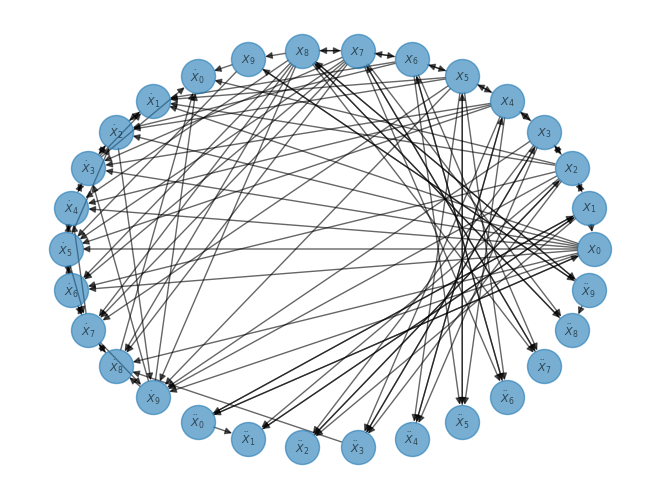

In [13]:
graph_discovery.plot_graph(type_label=False)

In [14]:
len(glob("graph_pickles/*.pickle"))

30

In [17]:
G_loaded=nx.DiGraph()
for path in glob("graph_pickles/*.pickle"):
    with open(path, 'rb') as f:  # notice the r instead of w
        G_loaded_1 = pickle.load(f)
    G_loaded=nx.compose(G_loaded_1,G_loaded)

In [6]:
G_loaded

In [7]:
def plot_a_network(G,type_label=True):
    pos=nx.kamada_kawai_layout(G, G.nodes())
    nx.draw(G, with_labels=True, pos=pos, node_size=600, font_size=8, alpha=0.6)
    if type_label:
        nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'type'))
    x_values, y_values = zip(*pos.values())
    x_max = max(x_values)
    x_min = min(x_values)
    x_margin = (x_max - x_min) * 0.25
    plt.xlim(x_min - x_margin, x_max + x_margin)

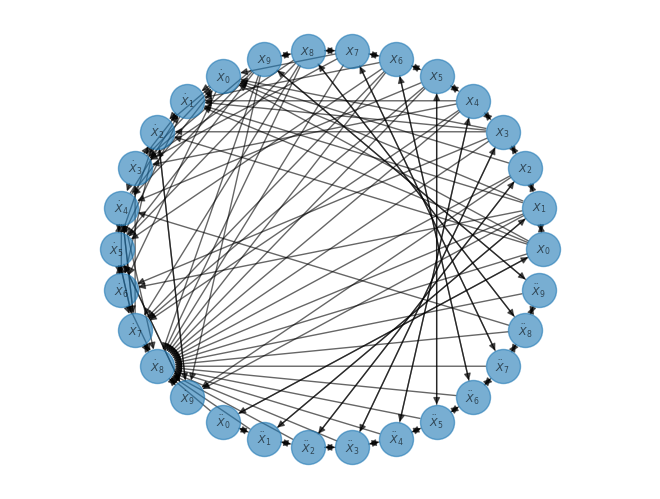

In [18]:
plot_a_network(G_loaded,type_label=False)

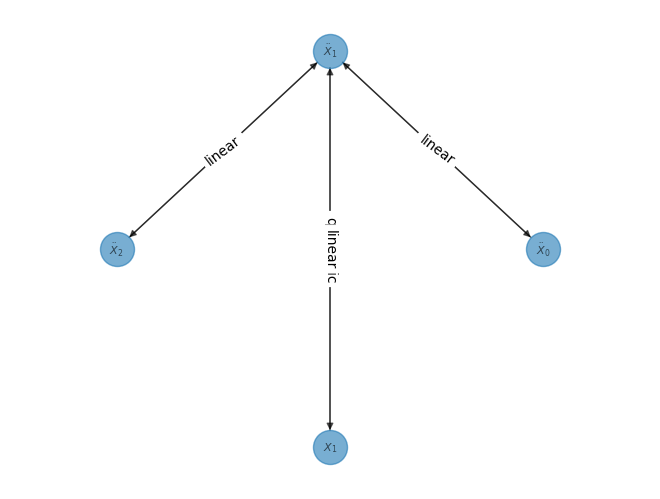

In [29]:
plot_a_network(nx.ego_graph(G_loaded.reverse(),'$\ddot{X}_{1}$',undirected=False,radius=1).reverse(),type_label=True)

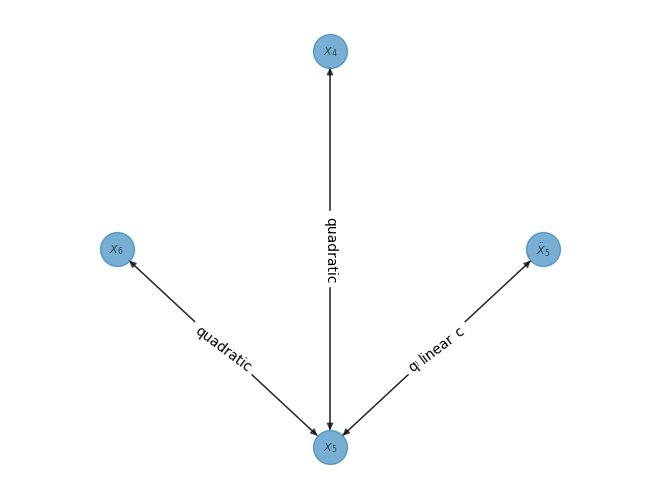

In [23]:
plot_a_network(nx.ego_graph(G_loaded.reverse(),'$X_{5}$',undirected=False,radius=1).reverse(),type_label=True)

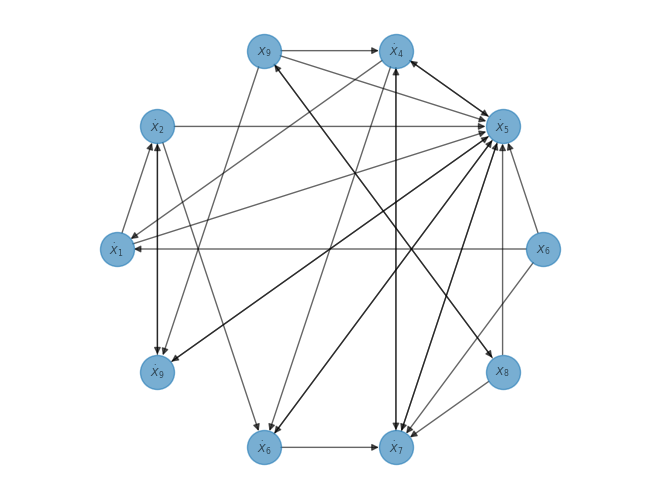

In [25]:
plot_a_network(nx.ego_graph(G_loaded.reverse(),'$\dot{X}_{5}$',undirected=False,radius=1).reverse(),type_label=False)